Importing needed libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import colorsys

# Load the dataset
df = pd.read_csv('Melbourne_cleaned.csv')


How property prices vary across different regions in Melbourne to identify which regions have the highest and lowest average prices.

                   Regionname     mean     median  count
5       Southern Metropolitan  1389019  1300000.0   8773
0        Eastern Metropolitan  1104916  1020000.0   2640
4  South-Eastern Metropolitan   889868   835500.0    857
2       Northern Metropolitan   868412   794903.4   6480
6        Western Metropolitan   841416   770000.0   4561
1            Eastern Victoria   695566   695566.3    107
3           Northern Victoria   598035   551000.0     78
7            Western Victoria   393855   385000.0     51


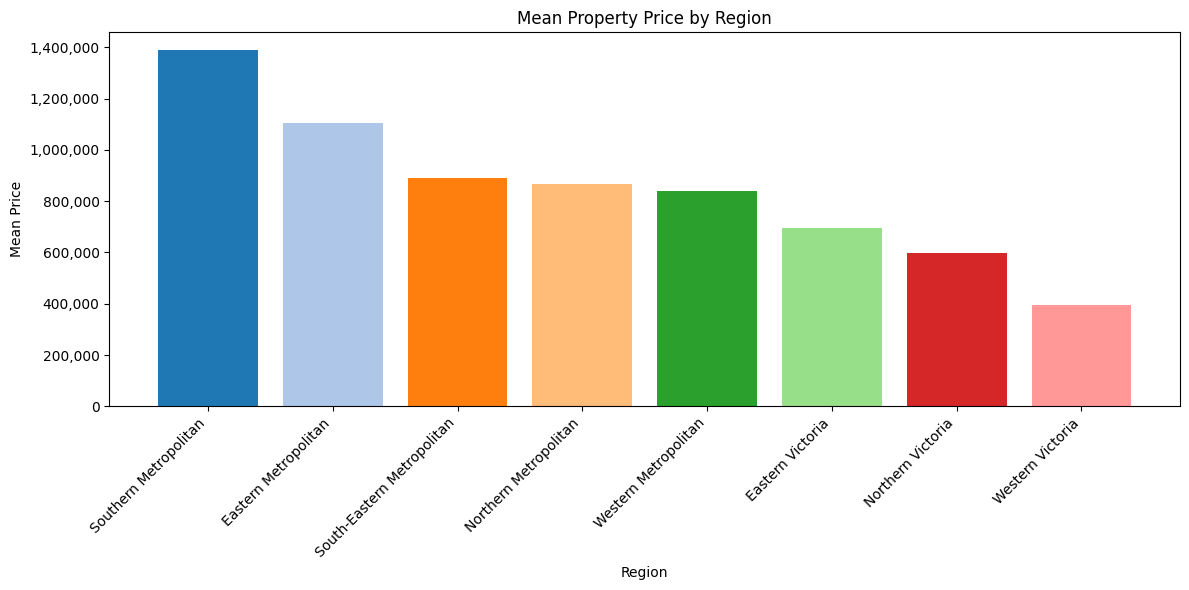

In [10]:
# Group by Regionname and calculate statistics
region_stats = df.groupby('Regionname')['Price'].agg(['mean', 'median', 'count']).reset_index()
region_stats = region_stats.sort_values(by='mean', ascending=False)
region_stats['mean'] = region_stats['mean'].round(0).astype(int)

# Print statistics
print(region_stats)

# Visualization: Bar chart of mean price per region with different colors
plt.figure(figsize=(12, 6))

# Generate a color for each bar
colors = plt.cm.tab20.colors  # 20 distinct colors from matplotlib colormap
bar_colors = colors[:len(region_stats)]  # take as many colors as needed

plt.bar(region_stats['Regionname'], region_stats['mean'], color=bar_colors)
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.title('Mean Property Price by Region')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Mean price per Suburb

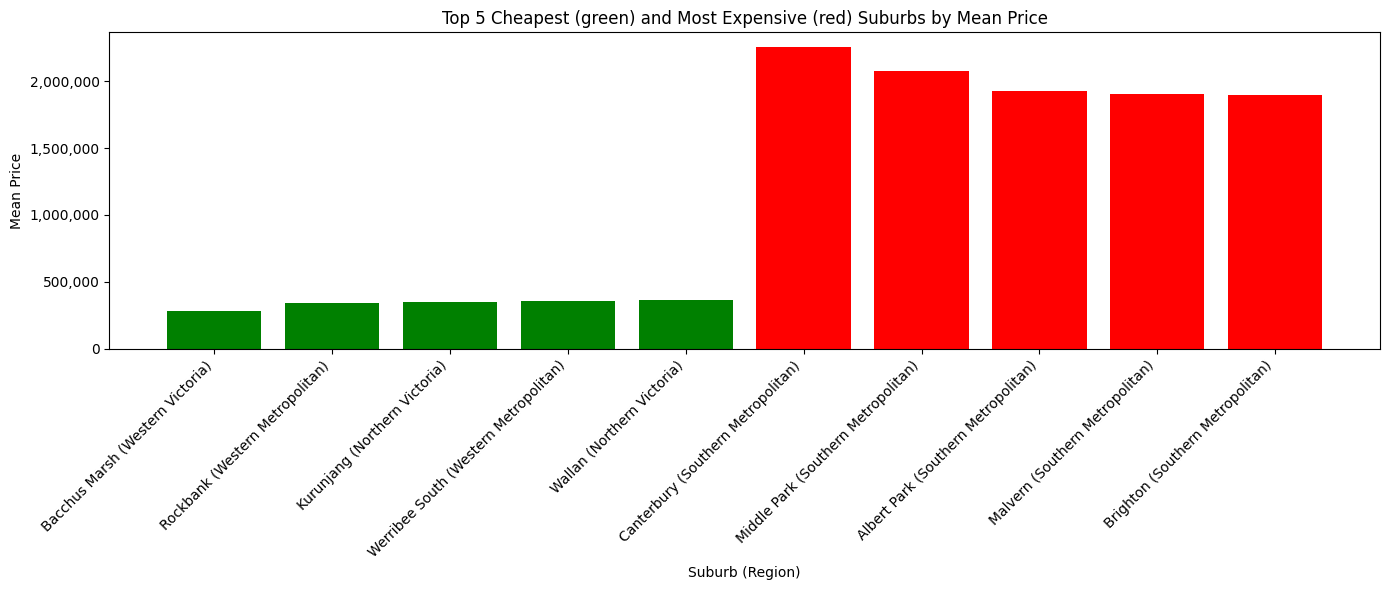

In [11]:
# Group by Suburb and Regionname, calculate mean price
suburb_stats = df.groupby(['Regionname', 'Suburb'])['Price'].mean().reset_index()

# Round for readability
suburb_stats['Price'] = suburb_stats['Price'].round(0).astype(int)

# Select top 5 cheapest and top 5 most expensive suburbs
top_cheapest = suburb_stats.nsmallest(5, 'Price')
top_expensive = suburb_stats.nlargest(5, 'Price')

# Combine for plotting
combined = pd.concat([top_cheapest, top_expensive]).copy()

# Create combined labels: "Suburb (Region)"
combined['Label'] = combined['Suburb'] + " (" + combined['Regionname'] + ")"

# Colors: green = cheapest, red = most expensive
colors = ['green']*len(top_cheapest) + ['red']*len(top_expensive)

# Visualization
plt.figure(figsize=(14, 6))
plt.bar(combined['Label'], combined['Price'], color=colors)
plt.xlabel('Suburb (Region)')
plt.ylabel('Mean Price')
plt.title('Top 5 Cheapest (green) and Most Expensive (red) Suburbs by Mean Price')
plt.xticks(rotation=45, ha='right')

# Format Y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

The distribution of property types (h - house, u - unit, t - townhouse) to understand the market composition.

        Type  Count  Percentage
0      House  15760   66.929970
1       Unit   5280   22.423239
2  Townhouse   2507   10.646792


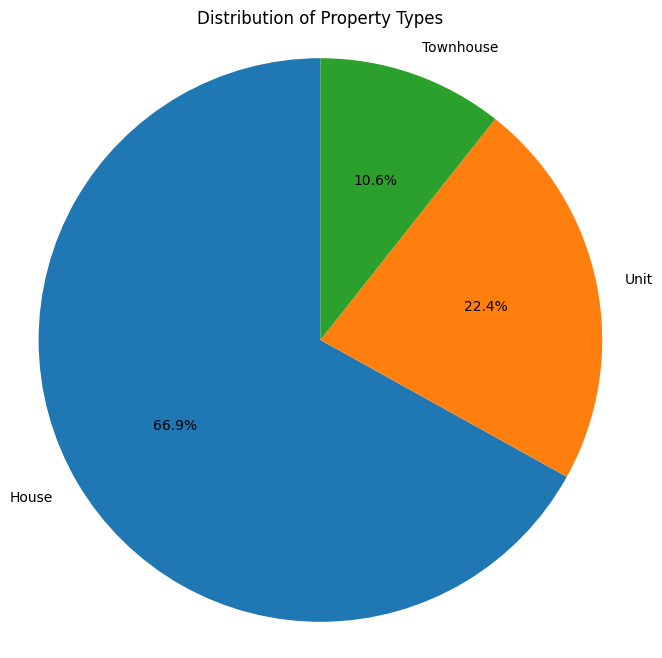

In [12]:
# Map codes to full names
type_mapping = {'h': 'House', 'u': 'Unit', 't': 'Townhouse'}
df['TypeFull'] = df['Type'].map(type_mapping)

# Calculate counts and percentages
type_counts = df['TypeFull'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
type_counts['Percentage'] = (type_counts['Count'] / type_counts['Count'].sum()) * 100

# Print statistics
print(type_counts)

# Visualization: Pie chart 
plt.figure(figsize=(8, 8))
plt.pie(type_counts['Count'], labels=type_counts['Type'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types')
plt.axis('equal')
plt.show()

Mean Price per Property

    TypeFull     mean   median  count
0      House  1224579  1080000  15760
1  Townhouse   963225   880000   2507
2       Unit   711640   625000   5280

Most Expensive Property Type by Mean Price:
TypeFull      House
mean        1224579
median      1080000
count         15760
Name: 0, dtype: object


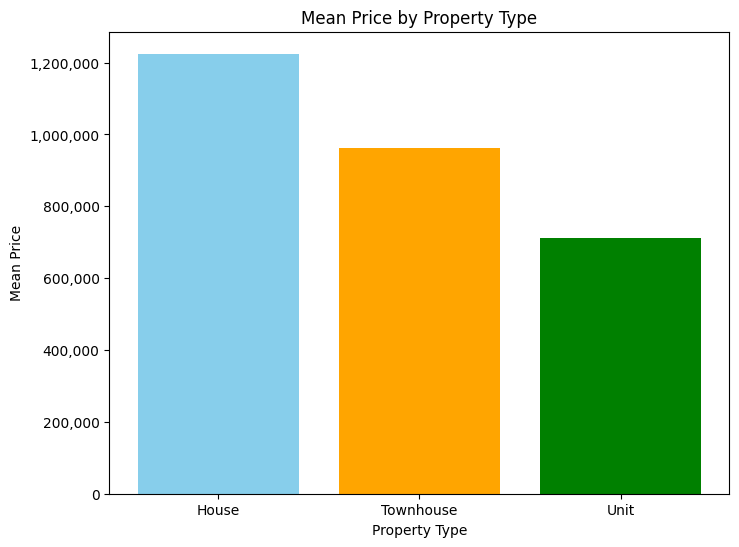

In [13]:
# Full type names
type_mapping = {'h': 'House', 'u': 'Unit', 't': 'Townhouse'}
df['TypeFull'] = df['Type'].map(type_mapping)

# Group by TypeFull and calculate mean price
type_price_stats = df.groupby('TypeFull')['Price'].agg(['mean', 'median', 'count']).reset_index()

# Round for readability
type_price_stats['mean'] = type_price_stats['mean'].round(0).astype(int)
type_price_stats['median'] = type_price_stats['median'].round(0).astype(int)

# Print the statistics
print(type_price_stats)

# Find the most expensive type by mean
most_expensive_type = type_price_stats.loc[type_price_stats['mean'].idxmax()]
print("\nMost Expensive Property Type by Mean Price:")
print(most_expensive_type)  

plt.figure(figsize=(8, 6))
plt.bar(type_price_stats['TypeFull'], type_price_stats['mean'], color=['skyblue', 'orange', 'green'])
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Property Type')

# Format Y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

The relationship between the number of bedrooms and property prices to see if more bedrooms generally lead to higher prices.

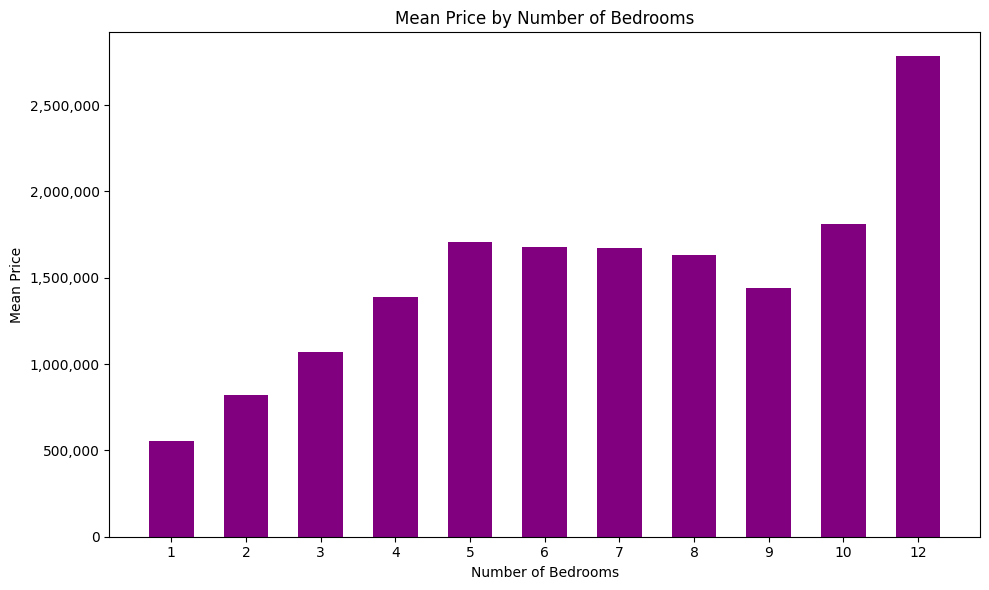

In [14]:
# Group by Bedroom and calculate mean price
mean_prices = df.groupby('Bedroom')['Price'].mean().round(0).astype(int).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_prices.index, mean_prices['Price'], color='purple', width=0.6)

# Use Bedroom numbers as labels
plt.xticks(mean_prices.index, mean_prices['Bedroom'])

plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price')
plt.title('Mean Price by Number of Bedrooms')

# Format Y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


Source    Mean Price (Bedroom)  Mean Price (Bedroom2)
Bedrooms                                             
1                     553141.0               560003.0
2                     822640.0               846847.0
3                    1068774.0              1073716.0
4                    1386495.0              1391625.0
5                    1705600.0              1682902.0
6                    1676010.0              1625270.0
7                    1670272.0              1662121.0
8                    1629214.0              1214453.0
9                    1442021.0              1452660.0
10                   1810914.0               900000.0
12                   2782211.0                    0.0
20                         0.0              1650000.0
30                         0.0              1214144.0


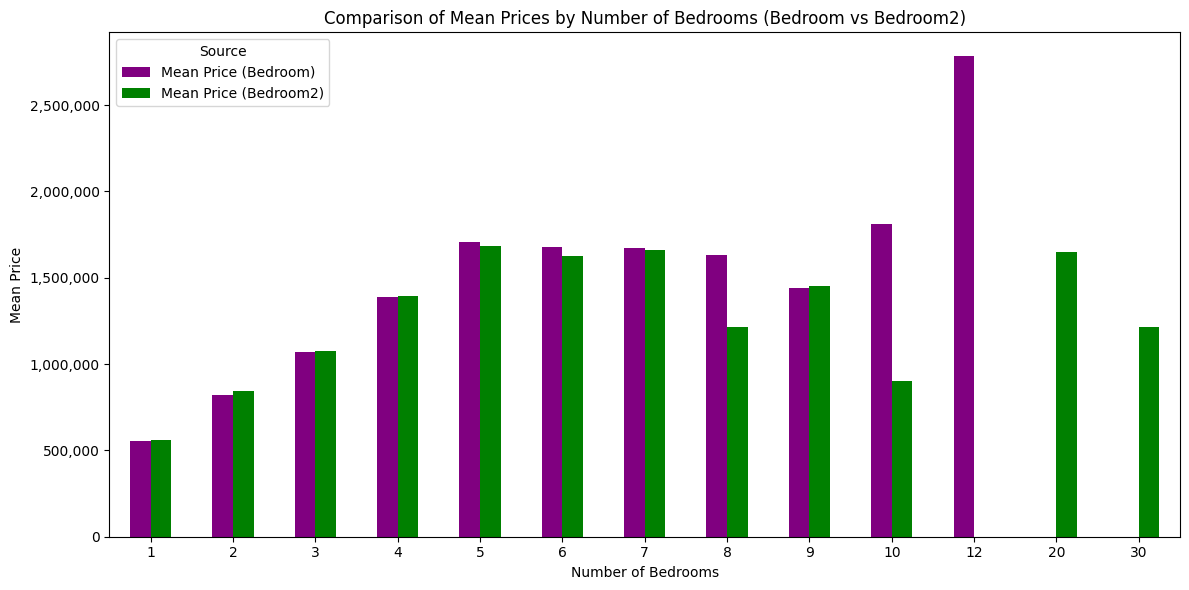

In [15]:
# Calculate mean prices for 'Bedroom' and 'Bedroom2'
mean_bedroom = df.groupby('Bedroom')['Price'].mean().round(0).astype(int).reset_index()
mean_bedroom.columns = ['Bedrooms', 'Mean Price (Bedroom)']

mean_bedroom2 = df.groupby('Bedroom2')['Price'].mean().round(0).astype(int).reset_index()
mean_bedroom2.columns = ['Bedrooms', 'Mean Price (Bedroom2)']

# Merge the two DataFrames on 'Bedrooms' to create a comparison table
comparison_df = pd.merge(mean_bedroom, mean_bedroom2, on='Bedrooms', how='outer').fillna(0)


# Melt the data
melted = pd.melt(comparison_df, id_vars=['Bedrooms'], value_vars=['Mean Price (Bedroom)', 'Mean Price (Bedroom2)'],
                 var_name='Source', value_name='Mean Price')

# Create pivot table with Bedrooms as index, Sources as columns
pivot = pd.pivot_table(melted, values='Mean Price', index='Bedrooms', columns='Source', aggfunc='first').fillna(0)

# Display the pivot table
print(pivot)

# Plot the comparison as side-by-side bars for visual comparison
pivot.plot(kind='bar', figsize=(12, 6), color=['purple', 'green'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price')
plt.title('Comparison of Mean Prices by Number of Bedrooms (Bedroom vs Bedroom2)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The trend of average property prices over time using the sale dates to identify any seasonal or yearly patterns.

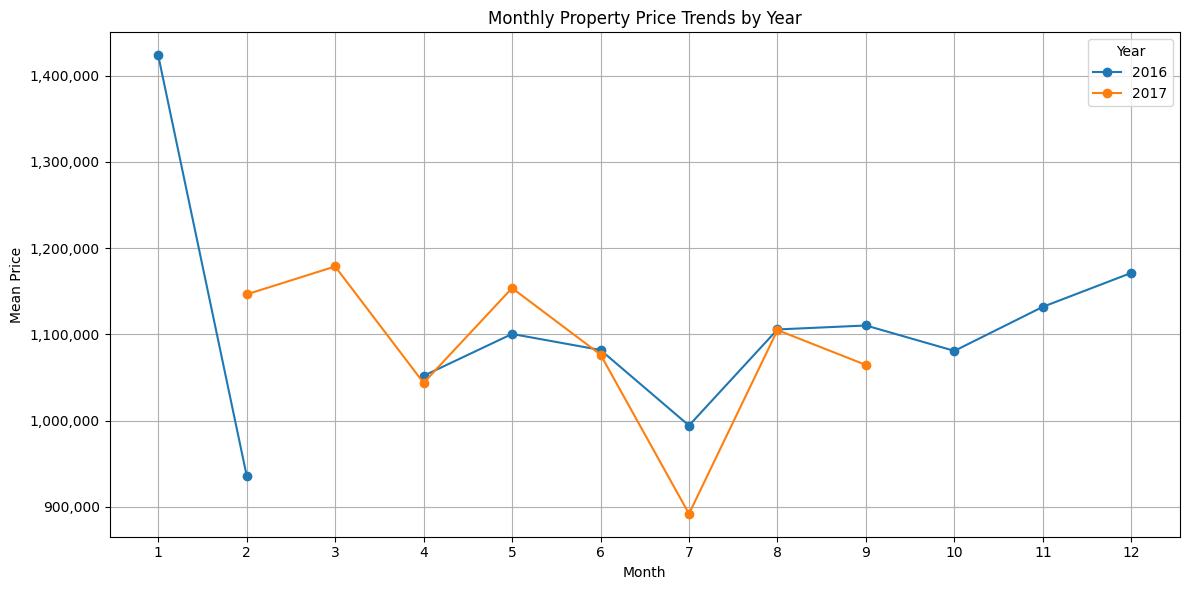

In [16]:
# Parse dates
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month, calculate mean price
monthly_stats = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()
monthly_stats['Price'] = monthly_stats['Price'].round(0).astype(int)

# Pivot table to have Years as columns, Months as rows
pivot = monthly_stats.pivot(index='Month', columns='Year', values='Price')

# Plot
plt.figure(figsize=(12, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Monthly Property Price Trends by Year')
plt.xticks(range(1, 13))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

The most successful real estate agents (SellerG)

Top 10 Sellers by Number of Properties Sold:
           SellerG  properties_sold  total_income
193         Nelson             2374    2387493618
135         Jellis             2320    3166348071
21           Barry             1998    1677841097
317  hockingstuart             1943    1909727992
171       Marshall             1474    2621305145
239            Ray             1251    1098124233
43          Buxton             1242    1532491285
29          Biggin              665     674617626
92       Fletchers              571     754539034
311       Woodards              510     542825463

Top 10 Sellers by Total Income (in AUD):
           SellerG  properties_sold  total_income
135         Jellis             2320    3166348071
171       Marshall             1474    2621305145
193         Nelson             2374    2387493618
317  hockingstuart             1943    1909727992
21           Barry             1998    1677841097
43          Buxton             1242    1532491285
239          

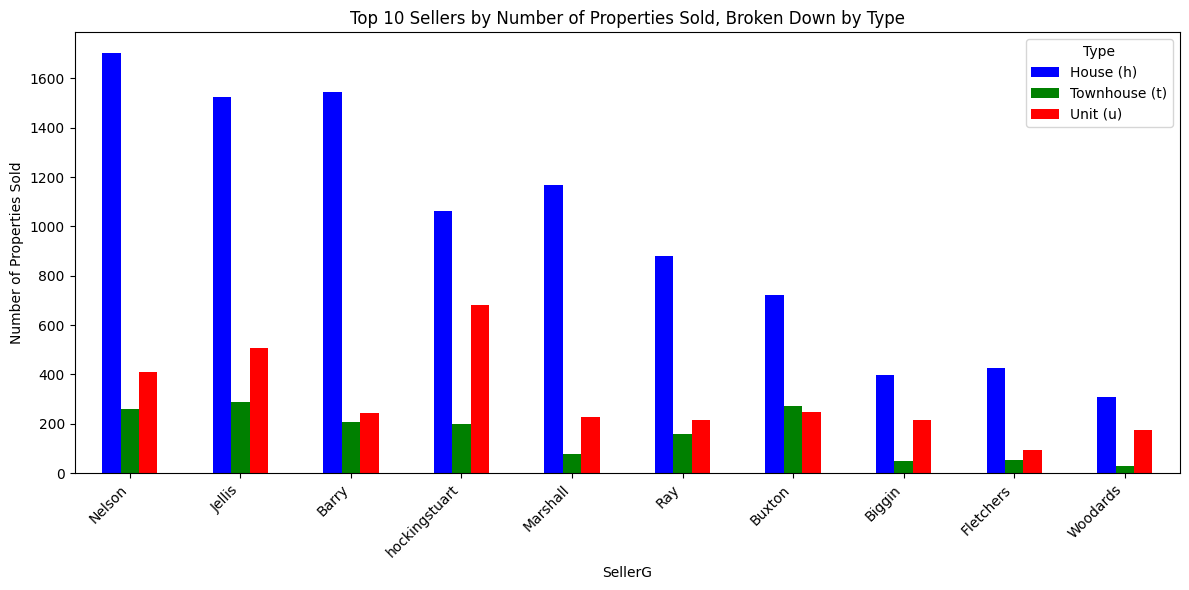

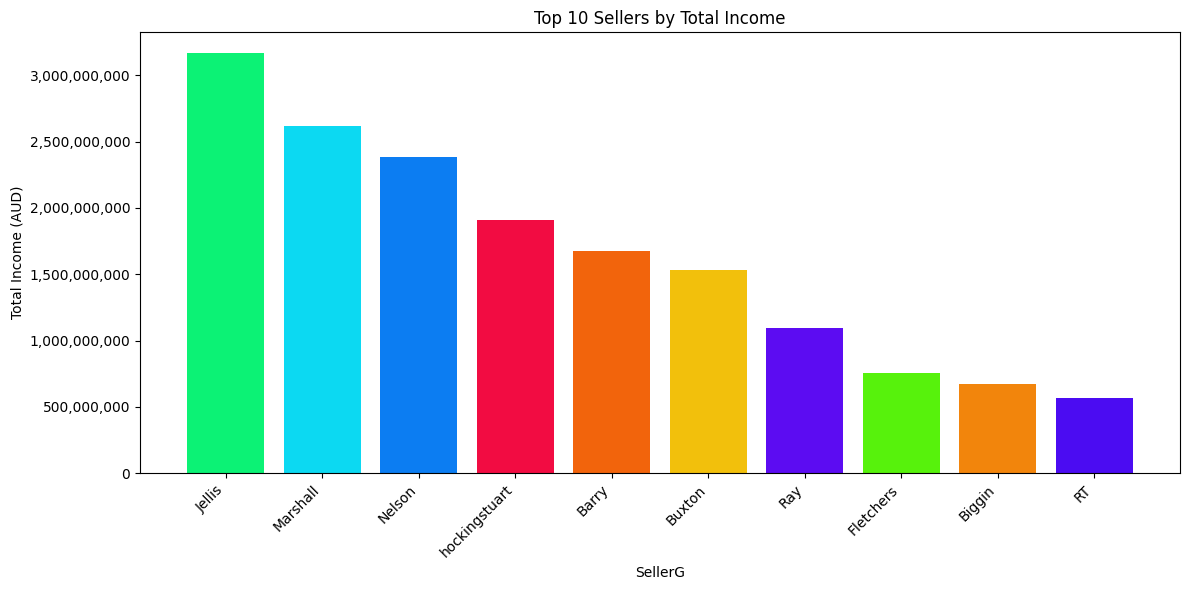

In [17]:
# Group by SellerG and calculate statistics
seller_stats = df.groupby('SellerG').agg(
    properties_sold=('Price', 'count'),
    total_income=('Price', 'sum')
).reset_index()

# Round total_income to nearest integer
seller_stats['total_income'] = seller_stats['total_income'].round(0).astype(int)

# Top 10 by properties sold
top_sold = seller_stats.sort_values(by='properties_sold', ascending=False).head(10)

# Top 10 by total income
top_income = seller_stats.sort_values(by='total_income', ascending=False).head(10)

# Print statistics
print("Top 10 Sellers by Number of Properties Sold:")
print(top_sold)
print("\nTop 10 Sellers by Total Income (in AUD):")
print(top_income)

# Function to generate N visually distinct colors
def generate_distinct_colors(n):
    colors = []
    for i in range(n):
        hue = i / n  
        lightness = 0.5
        saturation = 0.9
        rgb = colorsys.hls_to_rgb(hue, lightness, saturation)
        rgb_hex = '#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))
        colors.append(rgb_hex)
    return colors

# Map each SellerG to a distinct color
sellers = seller_stats['SellerG'].unique()
palette = generate_distinct_colors(len(sellers))
seller_colors = {seller: palette[i] for i, seller in enumerate(sellers)}

# Add income-to-properties-sold ratio
seller_stats['income_per_property'] = seller_stats['total_income'] / seller_stats['properties_sold']

# Filter sellers with at least 300 properties sold
filtered_stats = seller_stats[seller_stats['properties_sold'] >= 300]

# Find the seller with the best ratio
best_ratio = filtered_stats.sort_values(by='income_per_property', ascending=False).head(1)

print("Best Seller by Income-to-Properties-Sold Ratio (min 300 properties sold):")
print(best_ratio)

# Group by SellerG and Type to get counts per type
type_stats = df.groupby(['SellerG', 'Type']).size().reset_index(name='count')

# Get the top 10 sellers by total properties sold
top_sellers = top_sold['SellerG'].tolist()

# Filter type_stats for top sellers
filtered_type_stats = type_stats[type_stats['SellerG'].isin(top_sellers)]

# Pivot the data for plotting
pivot = filtered_type_stats.pivot(index='SellerG', columns='Type', values='count').fillna(0)

# Ensure columns are in order: h, t, u
pivot = pivot.reindex(columns=['h', 't', 'u'])

# Reindex rows to match the order of top_sellers
pivot = pivot.reindex(top_sellers)

# Define colors for each type
type_colors = {'h': 'blue', 't': 'green', 'u': 'red'}

# Grouped bar chart for top 10 by properties sold, broken down by type
pivot.plot(kind='bar', figsize=(12, 6), color=[type_colors[col] for col in pivot.columns])
plt.xlabel('SellerG')
plt.ylabel('Number of Properties Sold')
plt.title('Top 10 Sellers by Number of Properties Sold, Broken Down by Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', labels=['House (h)', 'Townhouse (t)', 'Unit (u)'])
plt.tight_layout()
plt.show()

# Bar chart for top 10 by total income
plt.figure(figsize=(12, 6))
colors_income = [seller_colors[s] for s in top_income['SellerG']]
plt.bar(top_income['SellerG'], top_income['total_income'], color=colors_income)
plt.xlabel('SellerG')
plt.ylabel('Total Income (AUD)')
plt.title('Top 10 Sellers by Total Income')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()